<a href="https://colab.research.google.com/github/nathaliuw/TP_MACHINE_LEARNING_NB/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import matplotlib
import numpy as np
import tensorflow 
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.applications.xception import Xception, preprocess_input
from keras.models import Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [66]:
from google.colab import drive
import os

# Monter Google Drive dans Colab
drive.mount('/content/gdrive')

# Spécifier le chemin d'accès au dossier sur Google Drive
path = "/content/gdrive/MyDrive/Colab_Notebooks/cats_and_dogs/train"
path2 = "/content/gdrive/MyDrive/Colab_Notebooks/cats_and_dogs/test"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:

train_datagen =  keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        path2,
        target_size=(300, 300),
        batch_size=16,
        shuffle=False)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [68]:

# Load pre-trained CNN - Here EfficientNetV2B0 trained on image-net dataset
base_model = Xception(weights='imagenet', include_top=False, input_shape=(300, 300, 3))



In [69]:
# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [70]:
x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)


In [71]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [73]:
A=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),

    epochs=2
)


Epoch 1/2
35/35 [==============================] - 257s 7s/step - loss: 0.5353 - accuracy: 0.9031
Epoch 2/2
35/35 [==============================] - 251s 7s/step - loss: 0.0576 - accuracy: 0.9803


In [74]:
loss, accuracy = model.evaluate(test_generator)

print('Loss on test set:', loss)
print('Accuracy on test set:', accuracy)

9/9 [==============================] - 58s 6s/step - loss: 0.1930 - accuracy: 0.9357
Loss on test set: 0.19303278625011444
Accuracy on test set: 0.9357143044471741


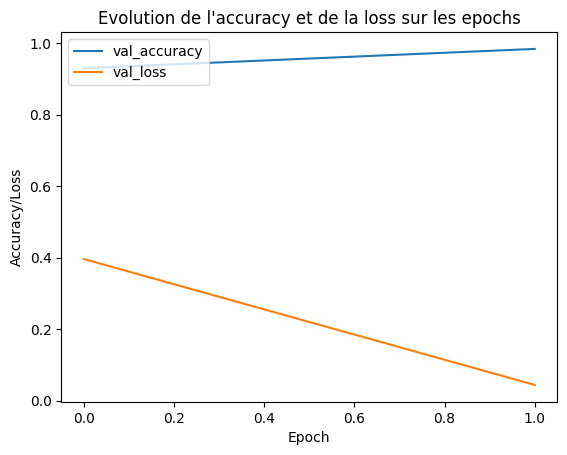

In [63]:
plt.plot(A.history['accuracy'])
plt.plot(A.history['loss'])
plt.title('Evolution de l\'accuracy et de la loss sur les epochs')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'val_loss', 'train_loss', 'val_loss'], loc='upper left')
plt.show()

9/9 [==============================] - 57s 6s/step


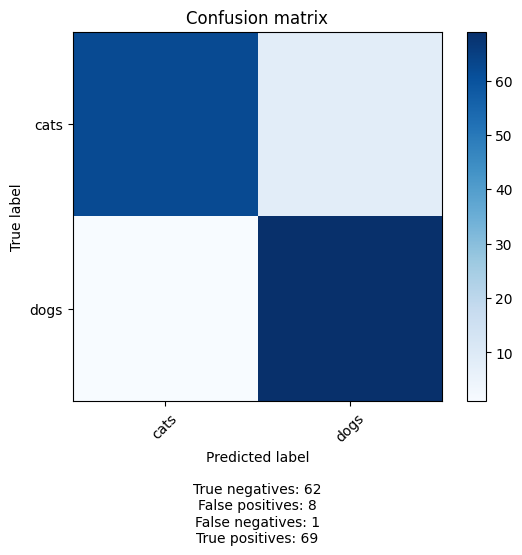

Accuracy: 0.9357142857142857
F1 score: 0.9355531686358753
Precision: 0.94011544011544
Recall: 0.9357142857142857


In [75]:
from sklearn.metrics import confusion_matrix
import itertools

# Get true labels
y_true_labels = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Compute number of true/false positives/negatives
tn, fp, fn, tp = cm.ravel()

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted label\n\nTrue negatives: {}\nFalse positives: {}\nFalse negatives: {}\nTrue positives: {}'.format(tn, fp, fn, tp))
plt.ylabel('True label')
plt.show()


# Print metrics
print('Accuracy:', accuracy_score(y_true_labels, y_pred_labels))
print('F1 score:', f1_score(y_true_labels, y_pred_labels, average='weighted'))
print('Precision:', precision_score(y_true_labels, y_pred_labels, average='weighted'))
print('Recall:', recall_score(y_true_labels, y_pred_labels, average='weighted'))